# Unit 5 - Financial Planning


In [55]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [56]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [57]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [58]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [59]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [60]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
#print(btc_response)
btc_data = btc_response.json()

print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
eth_response = requests.get(eth_url)
#print(eth_response)
eth_data = eth_response.json()
print(json.dumps(eth_data, indent=4))

btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
#print (btc_price)

eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
#print(eth_price)

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18495250,
            "total_supply": 18495250,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 10898.01,
                    "volume_24h": 19260397709,
                    "market_cap": 201561491039,
                    "percentage_change_1h": 0.228709549718776,
                    "percentage_change_24h": -1.30681844281904,
                    "percentage_change_7d": 4.39325856376327,
                    "percent_change_1h": 0.228709549718776,
                    "percent_change_24h": -1.30681844281904,
                    "percent_change_7d": 4.39325856376327
                }
            },
            "last_updated": 1600625302
        }
    },
    "metadata": {
        "timestamp": 1600625302,
        "num_cryp

In [61]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
print(my_btc_value)

13077.612


In [62]:
my_eth_value = eth_price * my_eth
print (my_eth_value)

1974.568


In [63]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13077.61
The current value of your 5.3 ETH is $1974.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [64]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [65]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(type(alpaca_api_key))
#print(type(alpaca_secret_key))

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version="v2")

In [66]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-18", tz="America/New_York").isoformat()

# If I wanted to run data for a rolling 365 days, see below. 
# start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365)).isoformat()
# end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers, 
    timeframe, 
    start=today, 
    end=today
).df

ticker_data.head()

# Pick AGG and SPY close prices
agg_close_price = ticker_data["AGG"]["close"]
#print(float(agg_close_price))

spy_close_price = ticker_data["SPY"]["close"]
#print(float(spy_close_price))

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${float(agg_close_price)}")
print(f"Current SPY closing price: ${float(spy_close_price)}")

Current AGG closing price: $118.24
Current SPY closing price: $330.69


In [67]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
#print(float(my_agg_value))

my_spy_value = my_spy * spy_close_price
#print(float(my_spy_value))

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${float(my_agg_value)}")
print(f"The current value of your {my_spy} SPY shares is ${float(my_spy_value)}")

The current value of your 200 AGG shares is $23648.0
The current value of your 50 SPY shares is $16534.5


### Savings Health Analysis

In [68]:
# Create savings DataFrame
funds = ["crypto", "shares"]
total_crypto_value = my_btc_value + my_eth_value
print(round(total_crypto_value,2))

total_shares_value = my_agg_value + my_spy_value
print(float(total_shares_value))

amount_info = {
    "amount": [total_crypto_value, float(total_shares_value)]
}

df_savings = pd.DataFrame(amount_info, index=funds)


# Display savings DataFrame
df_savings

15052.18
40182.5


,amount
crypto,15052.18
shares,40182.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

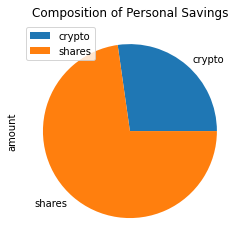

In [69]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Composition of Personal Savings")

In [115]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]
total_savings

# Validate saving health
if (total_savings) > (emergency_fund): 
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund: 
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are currently short of your savings goal by: ({emergency_fund - total_savings:0.2f})")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [71]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-09-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-18', tz='America/New_York').isoformat()

In [72]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336  195.70   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683  196.44   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125  193.88   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021  194.11   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416  192.15   

                                                              
                             high     low   close     volume  
time                                                          
2015-09-18 00:00:00-04:00  197.56  194.96  195.42  145482216  
2015-09-21 00:00:00-04:00  197.68  195.21  196.46   82723303  
2015-09-22 00:00:00-04:00  194.46  192.56  193.88  105035035  
2015-09-23 00:00:00-04:00  194.67  192.91  193.57   72992362  
2015-09-24 00:00:00-04:00  193.45  190.56  192.93  131840231

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares_data = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

# Printing the simulation input data
MC_shares_data.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [74]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992073,1.007773,0.986056,1.009033,1.010274,0.984120,1.010022,0.998666,1.007996,0.994185,...,1.002596,1.000661,0.998434,0.992063,0.997165,1.000891,0.999376,0.990627,0.993779,1.012710
2,0.989319,1.017827,0.998957,1.016603,1.012538,0.973633,1.004665,1.005384,1.022033,0.996650,...,1.005259,0.997151,1.008362,0.991992,1.008830,0.990710,0.995576,1.002033,0.997199,1.008917
3,0.994836,1.022443,1.002359,1.005084,1.004272,0.981952,1.010692,1.003969,1.014985,0.998356,...,1.005643,0.992467,1.001175,1.009206,1.004325,1.000018,1.006257,0.998583,1.003256,1.006488
4,0.994683,1.029971,0.991169,1.008535,1.005813,0.986389,1.008451,1.003284,1.018604,0.986930,...,1.001709,0.995749,1.008509,1.004192,1.006289,1.003075,1.019887,1.001138,0.994826,1.005507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.363112,5.873445,4.067675,9.681269,7.681249,4.401792,2.935948,4.843343,15.765539,6.839941,...,7.191026,5.427262,12.093363,4.946941,7.027325,3.403715,13.135139,8.943120,6.673120,12.168377
7557,13.367005,5.926225,4.073397,9.771654,7.635803,4.446477,2.919503,4.870246,15.748889,6.781985,...,7.194957,5.415266,12.064408,5.031048,6.907122,3.409919,13.026675,9.095908,6.683249,12.080304
7558,13.309947,5.873768,4.084098,9.781446,7.641797,4.444633,2.924583,4.889656,15.744999,6.780525,...,7.170993,5.371131,12.024880,5.043945,6.903943,3.401849,13.086088,9.045581,6.747817,12.088405
7559,13.276056,5.877849,4.062085,9.684417,7.664483,4.433012,2.929183,4.942274,15.798541,6.848065,...,7.025216,5.369389,11.967765,5.012113,6.902257,3.411858,13.122186,9.092607,6.697048,11.982066


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

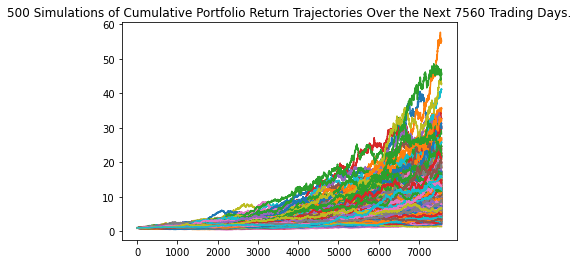

In [75]:
# Plot simulation outcomes
MC_shares_data.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

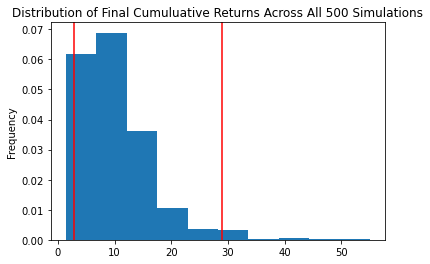

In [76]:
# Plot probability distribution and confidence intervals
MC_shares_data.plot_distribution()

### Retirement Analysis

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_table = MC_shares_data.summarize_cumulative_return()

# Print summary statistics
print(summary_table)

count           500.000000
mean             10.443931
std               6.743117
min               1.396187
25%               5.907376
50%               8.808080
75%              13.047998
max              55.105206
95% CI Lower      2.766817
95% CI Upper     29.012125
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [78]:
# Set initial investment
initial_investment_original = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_ci_original = round(summary_table[8]*initial_investment_original, 2)
upper_ci_original = round(summary_table[9]*initial_investment_original, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_original} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci_original} and ${upper_ci_original}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55336.34 and $580242.49


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [79]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_ci_increase = round(summary_table[8]*initial_investment_increase, 2)
upper_ci_increase = round(summary_table[9]*initial_investment_increase, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci_increase} and ${upper_ci_increase}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83004.5 and $870363.74


### Analysis of Above Simulations

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*5
)

# Printing the simulation input data
MC_5_year.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991918,0.995232,1.005878,1.001991,1.009178,1.006286,1.003712,1.004601,0.999295,1.015857,...,1.008907,1.000168,0.992370,1.010922,0.996076,1.001210,0.999282,1.005583,1.008478,0.998686
2,0.985612,0.997494,1.002891,0.999561,1.000715,0.996782,0.997760,1.009654,1.000686,1.023099,...,0.997617,1.002291,1.005831,0.999548,0.983014,1.023875,0.992074,1.006887,1.008955,0.989361
3,0.985971,0.996322,1.000065,1.003816,0.995118,1.003000,0.994152,1.029955,1.003694,1.023928,...,0.988952,0.999126,0.999102,1.007170,0.985885,1.023830,1.007449,1.010148,1.014286,0.992949
4,0.988694,0.997033,1.000638,1.016325,0.987572,1.016190,0.991100,1.019180,1.005183,1.031204,...,0.986674,1.005352,0.997921,0.996621,0.976180,1.020410,1.019197,1.018563,1.016330,1.004975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.000210,1.581149,1.200002,1.605209,1.986429,1.350538,1.346003,1.380546,1.434766,1.259499,...,1.290404,1.415643,2.101700,1.680957,1.396725,1.457809,1.762891,1.518404,1.478826,1.162880
1257,1.002707,1.573958,1.196653,1.611500,1.984892,1.357283,1.353458,1.376993,1.422466,1.260536,...,1.302819,1.427070,2.097598,1.686953,1.381470,1.453764,1.767176,1.523853,1.489383,1.178193
1258,0.998450,1.570071,1.189643,1.603572,1.992076,1.353905,1.369434,1.379713,1.432416,1.268779,...,1.299389,1.451614,2.104700,1.690431,1.376820,1.453278,1.758983,1.514682,1.501618,1.172788
1259,0.993074,1.562452,1.192512,1.609188,1.979860,1.358198,1.380717,1.373569,1.436352,1.271709,...,1.296456,1.437907,2.119448,1.670952,1.367781,1.457361,1.748438,1.492646,1.489197,1.171791


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

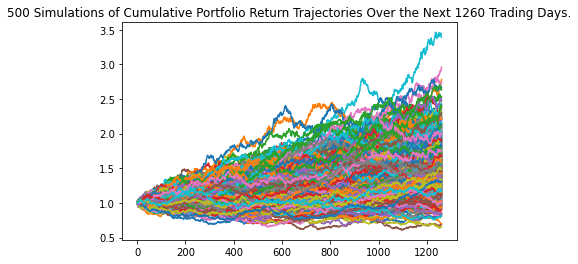

In [82]:
# Plot simulation outcomes
MC_5_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

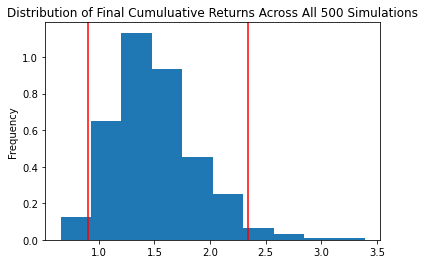

In [83]:
# Plot probability distribution and confidence intervals
MC_5_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
table_5_year = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(table_5_year)

count           500.000000
mean              1.506347
std               0.382784
min               0.656293
25%               1.254777
50%               1.462492
75%               1.706689
max               3.391909
95% CI Lower      0.902948
95% CI Upper      2.340980
Name: 1260, dtype: float64


In [85]:
# Set initial investment
initial_investment_5 = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci_5 = round(table_5_year[8] * initial_investment_5, 2)
upper_ci_5 = round(table_5_year[9] * initial_investment_5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_5} and ${upper_ci_5}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $67721.13 and $175573.48


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data=df_stock_data, 
    weights=[.40, .60],
    num_simulation=500, 
    num_trading_days=252*10
)

# Printing the simulation input data
MC_10_year.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009777,0.989818,0.996812,1.002323,1.000545,0.989204,0.997026,1.004801,0.989638,0.993904,...,1.009558,1.000130,0.994917,0.999098,0.997443,1.009144,0.988451,0.994552,0.987797,1.009240
2,1.003921,0.997266,1.002734,1.004684,1.007579,0.979842,0.997640,1.000228,0.981370,0.997872,...,1.006116,0.999354,1.001383,1.002664,0.993457,1.012824,0.997947,1.006827,1.002949,1.011019
3,0.999114,1.002526,1.017392,1.005524,1.002949,0.980864,0.993826,0.989007,0.989501,1.004158,...,1.016175,0.999631,0.995411,0.996464,0.989705,1.024918,0.993793,0.989952,1.000547,1.004364
4,1.002157,1.003701,1.026073,1.012520,1.000019,0.988265,0.991298,0.973937,0.978187,1.000579,...,1.018335,0.995344,0.997341,0.995930,0.972908,1.021529,0.978931,0.989304,1.008825,1.012732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.557680,3.807502,2.563106,3.076992,1.438285,1.460204,2.359359,3.395208,4.067441,0.728724,...,3.895189,2.498179,0.798851,1.913267,2.722404,2.067000,3.812888,1.485946,2.958017,1.942682
2517,2.556525,3.797377,2.560324,3.050685,1.420603,1.462761,2.360949,3.376182,4.098028,0.730370,...,3.881007,2.493045,0.796152,1.906646,2.764582,2.099076,3.803448,1.496292,2.952304,1.919914
2518,2.552394,3.819700,2.573448,3.045772,1.426423,1.479623,2.360739,3.389209,4.067534,0.743836,...,3.906566,2.481755,0.787198,1.899212,2.760087,2.070727,3.812611,1.514872,2.948190,1.926389
2519,2.546098,3.842690,2.577316,3.036422,1.429733,1.492643,2.358167,3.357613,4.079945,0.750972,...,3.899576,2.465646,0.783393,1.921866,2.756450,2.058209,3.838522,1.509085,2.995108,1.926905


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

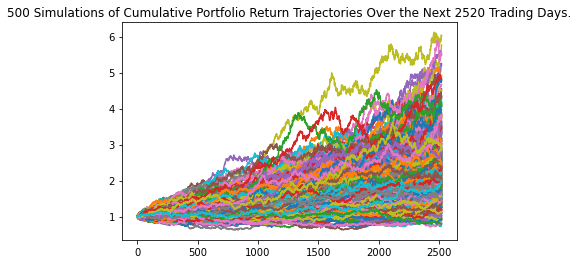

In [88]:
# Plot simulation outcomes
MC_10_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

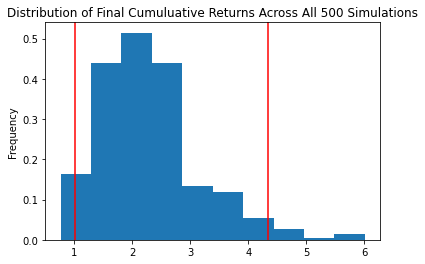

In [89]:
# Plot probability distribution and confidence intervals
MC_10_year.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
table_ten_year = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(table_ten_year)

count           500.000000
mean              2.285152
std               0.861290
min               0.759868
25%               1.687586
50%               2.153178
75%               2.704044
max               6.007737
95% CI Lower      1.011529
95% CI Upper      4.342307
Name: 2520, dtype: float64


In [96]:
# Set initial investment
initial_investment_10 = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci_10 = round(table_ten_year[8] * initial_investment_10, 2)
upper_ci_10 = round(table_ten_year[9] * initial_investment_10, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${lower_ci_10} and ${upper_ci_10}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 10 years will end within in the range of $75864.68 and $325672.99


## More Optional Simulations
### 5 Year Retirement - Adjusted Portfolio Weights & Initial Investment

In [97]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns & adjusted weights.
MC_5_adjust = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.25, .75],
    num_simulation=500,
    num_trading_days=252*5
)

# Printing the simulation input data
MC_5_adjust.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [98]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_adjust.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009885,0.992921,1.004876,0.993106,0.998902,1.015715,0.992914,0.994593,0.990412,1.005570,...,0.990079,1.009447,0.998933,0.982827,1.007669,1.017577,1.003031,0.988154,0.985294,0.989073
2,1.000077,0.984147,1.012371,0.987426,1.004075,1.014896,1.000411,0.985084,0.998192,1.016039,...,0.986790,1.011603,0.990908,0.970505,1.030181,1.024063,1.013276,0.992476,0.979967,0.985431
3,0.996342,0.975365,1.005640,1.000074,1.008243,1.035444,0.994897,1.001428,1.000585,1.028332,...,0.980590,1.006049,0.984583,0.953207,1.042944,1.012848,1.011534,0.986017,0.972389,0.989715
4,0.986067,0.979205,0.997518,0.996745,1.005303,1.043368,0.997044,0.988045,1.005300,1.027720,...,0.980593,1.011464,0.991695,0.941243,1.040786,1.016156,1.029270,0.990446,0.973384,0.998128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.183787,1.600054,1.277554,1.821346,2.304304,1.361976,1.539524,1.387685,1.154051,0.853649,...,1.385618,2.707249,1.420495,1.338094,2.307201,1.337587,2.332221,1.575253,2.536095,1.315473
1257,2.179137,1.603863,1.272952,1.823224,2.317220,1.326818,1.563716,1.365063,1.147781,0.855059,...,1.371075,2.694687,1.430568,1.344739,2.298688,1.350749,2.317796,1.576684,2.528247,1.294973
1258,2.183422,1.624137,1.298553,1.814520,2.284689,1.342565,1.541644,1.374088,1.153151,0.843502,...,1.395384,2.715167,1.445451,1.346610,2.287371,1.346743,2.313976,1.563177,2.522269,1.300246
1259,2.193165,1.633095,1.319973,1.816004,2.285193,1.311313,1.553620,1.357010,1.153372,0.839554,...,1.398462,2.700289,1.469948,1.338912,2.258741,1.358210,2.319810,1.587860,2.477758,1.300189


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

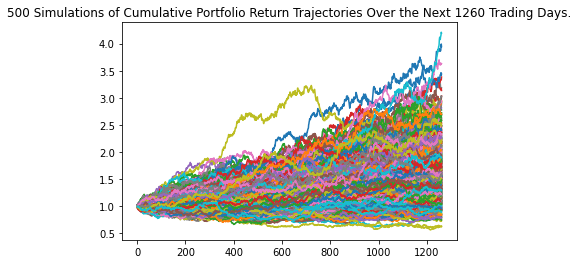

In [99]:
# Plot simulation outcomes
MC_5_adjust.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

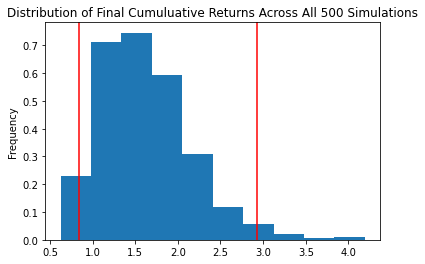

In [100]:
# Plot probability distribution and confidence intervals
MC_5_adjust.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
adjusted_5_year = MC_5_adjust.summarize_cumulative_return()

# Print summary statistics
print(adjusted_5_year)

count           500.000000
mean              1.626628
std               0.533869
min               0.624759
25%               1.238550
50%               1.555825
75%               1.905878
max               4.193036
95% CI Lower      0.845256
95% CI Upper      2.922500
Name: 1260, dtype: float64


In [102]:
# Set initial investment
initial_investment_5_adjust = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci_5_adjust = round(adjusted_5_year[8] * initial_investment_5_adjust, 2)
upper_ci_5_adjust = round(adjusted_5_year[9] * initial_investment_5_adjust, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_adjust} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_5_adjust} and ${upper_ci_5_adjust}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $63394.23 and $219187.5


### 10 Year Retirement - Adjusted Portfolio Weights & Initial Investment

In [103]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns & adjusted weights. 
MC_10_adjust = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.25, .75],
    num_simulation=500,
    num_trading_days=252*10
)

# Printing the simulation input data
MC_10_adjust.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125   
2015-09-23 00:00:00-04:00  109.29  109.29  109.10  109.170  1390021   
2015-09-24 00:00:00-04:00  109.49  109.51  109.24  109.299  2541416   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-18 00:00:00-04:00          NaN  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   
2015-09-23 00:00:00-04:00    -0.000915  194.11  194.67  192.91  193.57   
2015-09-24 00:00:00-04:00     0.001182  192.15  193.45  190.56  192.93   

                                                   
                              volume daily_return  
time                                               
2015-09-18 00:00:00-04:00  145482216          NaN  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132  
2015-09-23 00:00:00-04:00   72992362    -0.001599  
2015-09-24 00:00:00-04:00  131840231    -0.003306

In [104]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_adjust.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000454,1.008610,0.981758,0.984651,0.996572,1.000488,1.011749,1.008618,1.002398,0.994243,...,0.997833,0.993165,1.001366,0.989988,0.989687,1.020131,1.008805,0.990279,1.007054,0.990419
2,0.998407,1.016802,0.974922,0.972548,1.007952,1.005242,1.027682,1.015099,1.006685,0.982124,...,0.991314,0.975275,1.015425,0.979723,1.010123,1.027449,1.004889,0.992314,1.001994,0.992117
3,0.997984,1.017610,0.970244,0.978437,1.007053,1.017773,1.017582,1.003565,1.005451,0.984498,...,0.990322,0.964156,1.009376,0.983174,1.005465,1.026178,1.011114,0.983809,1.007715,0.977856
4,0.994900,1.010743,0.963091,0.968553,1.009404,1.019299,1.008288,0.987759,1.016583,0.970925,...,0.984349,0.975646,0.986421,0.982870,1.005919,1.016075,1.012169,1.001321,0.989677,0.977181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.056318,2.983042,2.645156,3.274984,1.426342,1.359457,3.967342,1.043684,3.314727,2.312779,...,1.574878,2.921968,1.538099,1.049231,3.379149,3.726370,4.935076,1.869238,1.618499,2.457694
2517,2.066695,2.972806,2.607996,3.295182,1.431560,1.379322,3.977626,1.051269,3.306056,2.341846,...,1.572800,2.881571,1.527922,1.027373,3.373712,3.752546,5.011785,1.875481,1.634970,2.465902
2518,2.037367,2.942932,2.607611,3.261763,1.438417,1.383984,4.020917,1.039204,3.298544,2.325142,...,1.579194,2.834165,1.531000,1.054474,3.325052,3.713146,5.081949,1.883740,1.655787,2.481697
2519,2.057753,2.937275,2.602382,3.283858,1.463286,1.380546,4.017242,1.033537,3.259727,2.320703,...,1.584958,2.848133,1.529345,1.046403,3.301371,3.710349,5.197227,1.913706,1.630149,2.479700


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

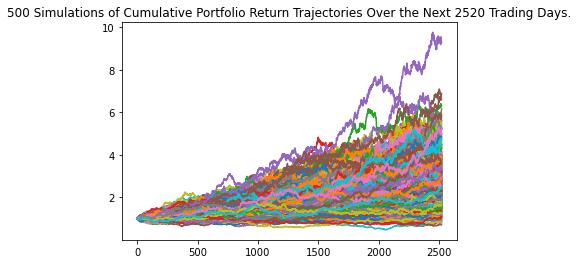

In [105]:
# Plot simulation outcomes
MC_10_adjust.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

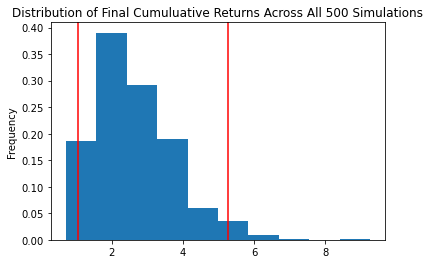

In [106]:
# Plot probability distribution and confidence intervals
MC_10_adjust.plot_distribution()

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
adjusted_10_year = MC_10_adjust.summarize_cumulative_return()

# Print summary statistics
print(adjusted_10_year)

count           500.000000
mean              2.650628
std               1.142444
min               0.705778
25%               1.819101
50%               2.438793
75%               3.300676
max               9.263046
95% CI Lower      1.044920
95% CI Upper      5.275262
Name: 2520, dtype: float64


In [108]:
# Set initial investment
initial_investment_10_adjust = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci_10_adjust = round(adjusted_10_year[8] * initial_investment_10_adjust, 2)
upper_ci_10_adjust = round(adjusted_10_year[9] * initial_investment_10_adjust, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_adjust} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_10_adjust} and ${upper_ci_10_adjust}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $78369.0 and $395644.66


In [111]:
print("60% Stocks / 40% Bonds / Initial Invesment: $20,000")
print(f"There is a 95% chance that an initial investment of ${initial_investment_original} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci_original} and ${upper_ci_original}")
print("*"*114)

print("60% Stocks / 40% Bonds / Initial Invesment: $30,000")
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci_increase} and ${upper_ci_increase}")
print("*"*114)

print("5 Year Retirement with $75,000 Initial Investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_5} and ${upper_ci_5}")
print("*"*114)

print("10 Year Retirement with $75,000 Initial Investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${lower_ci_10} and ${upper_ci_10}")
print("*"*114)

print("5 Year Retirement with 75% Stocks / 25% Bonds / $75,000 Initial Investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_adjust} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_5_adjust} and ${upper_ci_5_adjust}")
print("*"*114)

print("10 Year Retirement with 75% Stocks / 25% Bonds / $75,000 Initial Investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_adjust} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci_10_adjust} and ${upper_ci_10_adjust}")

60% Stocks / 40% Bonds / Initial Invesment: $20,000
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55336.34 and $580242.49
******************************************************************************************************************
60% Stocks / 40% Bonds / Initial Invesment: $30,000
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83004.5 and $870363.74
******************************************************************************************************************
5 Year Retirement with $75,000 Initial Investment
There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $67721.13 and $175573.48
******************************************************************************************************************
10 Year Retirement with $75,000 I

### Analysis of All Simulations